In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("../../Datasets/Customer Churn/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# One Hot Encoding the categorical variables
df = pd.get_dummies(df, columns = ["Geography", "Gender"], drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
# split the dataset into training set and test set
X = df.drop(columns = ["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
# scale the numerical variables
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=11, activation="relu", input_dim = 11),
    tf.keras.layers.Dense(units=11, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [34]:
# compile the model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

# train the model
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 3s 9ms/step - loss: 0.5794 - accuracy: 0.7255 - val_loss: 0.4953 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4598 - accuracy: 0.8011 - val_loss: 0.4468 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4250 - accuracy: 0.8211 - val_loss: 0.4234 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4086 - accuracy: 0.8313 - val_loss: 0.4111 - val_accuracy: 0.8206
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3968 - accuracy: 0.8359 - val_loss: 0.3995 - val_accuracy: 0.8256
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3864 - accuracy: 0.8384 - val_loss: 0.3898 - val_accuracy: 0.8288
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3770 - accuracy: 0.8427 - val_loss: 0.3805 - val_accuracy: 0.8319

Epoch 58/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3233 - accuracy: 0.8675 - val_loss: 0.3454 - val_accuracy: 0.8544
Epoch 59/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3219 - accuracy: 0.8675 - val_loss: 0.3468 - val_accuracy: 0.8544
Epoch 60/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3226 - accuracy: 0.8675 - val_loss: 0.3473 - val_accuracy: 0.8550
Epoch 61/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3228 - accuracy: 0.8670 - val_loss: 0.3459 - val_accuracy: 0.8569
Epoch 62/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3223 - accuracy: 0.8669 - val_loss: 0.3491 - val_accuracy: 0.8537
Epoch 63/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3218 - accuracy: 0.8687 - val_loss: 0.3473 - val_accuracy: 0.8544
Epoch 64/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3225 - accuracy: 0.8689 - val_loss: 0.3457 - val_accuracy:

In [29]:
model.layers[0].get_weights()

[array([[-1.20282933e-01,  7.13405386e-02, -4.11472609e-03,
         -6.58786893e-02, -1.09834492e-01,  6.91554621e-02,
          9.02783871e-02,  6.54873997e-02,  1.74064785e-01,
          3.75192538e-02,  8.03352967e-02],
        [ 6.55389309e-01, -9.55413103e-01, -2.84941375e-01,
         -1.09032035e-01,  5.70021093e-01,  6.70947373e-01,
          5.58320165e-01, -5.30125380e-01,  2.71129489e-01,
         -1.08242881e+00,  5.04569292e-01],
        [-2.78051972e-01, -1.93474904e-01,  1.18727083e-04,
         -3.19355041e-01, -6.00216500e-02,  2.91249454e-01,
          6.56905621e-02, -2.68831342e-01, -2.46072978e-01,
          2.89955080e-01, -1.62883122e-02],
        [ 2.78028876e-01, -1.36825696e-01,  1.48710907e-01,
         -3.24152559e-01, -4.25988078e-01,  3.39928120e-01,
         -6.81475848e-02,  1.78250164e-01,  3.87815088e-01,
          1.12102099e-01, -5.99461645e-02],
        [ 4.88083422e-01,  3.45718682e-01,  1.26837218e+00,
          8.82624164e-02, -8.27917084e-02,  

In [30]:
model.layers[1].get_weights()

[array([[ 1.9843882e-01, -6.9086976e-02,  4.3467343e-01,  1.5194027e-01,
          6.3445669e-01, -1.1755918e+00, -1.5688379e-01,  3.3020306e-01,
          2.5789273e-01,  3.9833018e-01,  6.9973946e-01],
        [-2.9567629e-01, -1.9785647e-01,  3.7150752e-02,  2.3651050e-01,
         -8.4000088e-02,  3.3239514e-01,  6.6858494e-01,  5.0680995e-01,
          4.1651818e-01, -1.2541372e+00,  4.4318348e-01],
        [ 1.0847957e+00, -2.6499267e+00,  3.3391526e-01,  4.5706075e-02,
          6.9360793e-01, -4.0466342e-02, -8.6404711e-02, -2.3523165e-01,
         -2.2766277e-01,  8.5393578e-02, -2.8987221e-02],
        [ 1.4660886e-01,  1.0021068e+00,  3.0506796e-01, -8.4083505e-02,
         -4.0231535e-01, -1.0391461e-01, -1.5690435e-02, -3.4443539e-01,
         -2.6286569e-01,  2.7688769e-01, -1.7365171e-02],
        [-7.5568289e-01,  3.2015315e-01,  5.4523957e-01,  5.5794013e-03,
         -3.9609653e-01, -1.2495918e-01, -8.4044233e-02, -1.0430530e+00,
         -4.3794196e-03,  2.1939379e-0

In [31]:
y_log  = model.predict(X_test_scaled)

y_pred = np.where(y_log > 0.5, 1, 0)

accuracy_score(y_test, y_pred)

0.8665

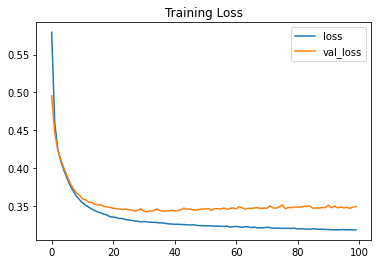

In [37]:
plt.title("Training Loss")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

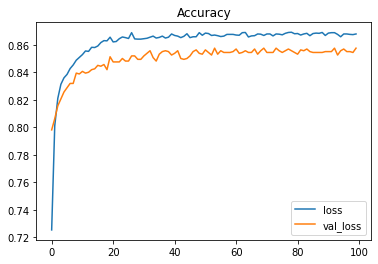

In [38]:
plt.title("Accuracy")
plt.plot(history.history["accuracy"], label="loss")
plt.plot(history.history["val_accuracy"], label="val_loss")
plt.legend()
plt.show()